<a href="https://colab.research.google.com/github/emreakbulut06/MachineLearning/blob/main/ML_FinalOdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# 1. ve 2 sorular için kodlar...
# Pima Indians Diabetes Dataset'i yüklüyoruz
veri = "veri-seti.txt"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(veri, sep="\t", header=None, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Veri setinin genel bilgileri
df.info()

# Temel istatistikler
df.describe()

# Sınıf dağılımı
df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64

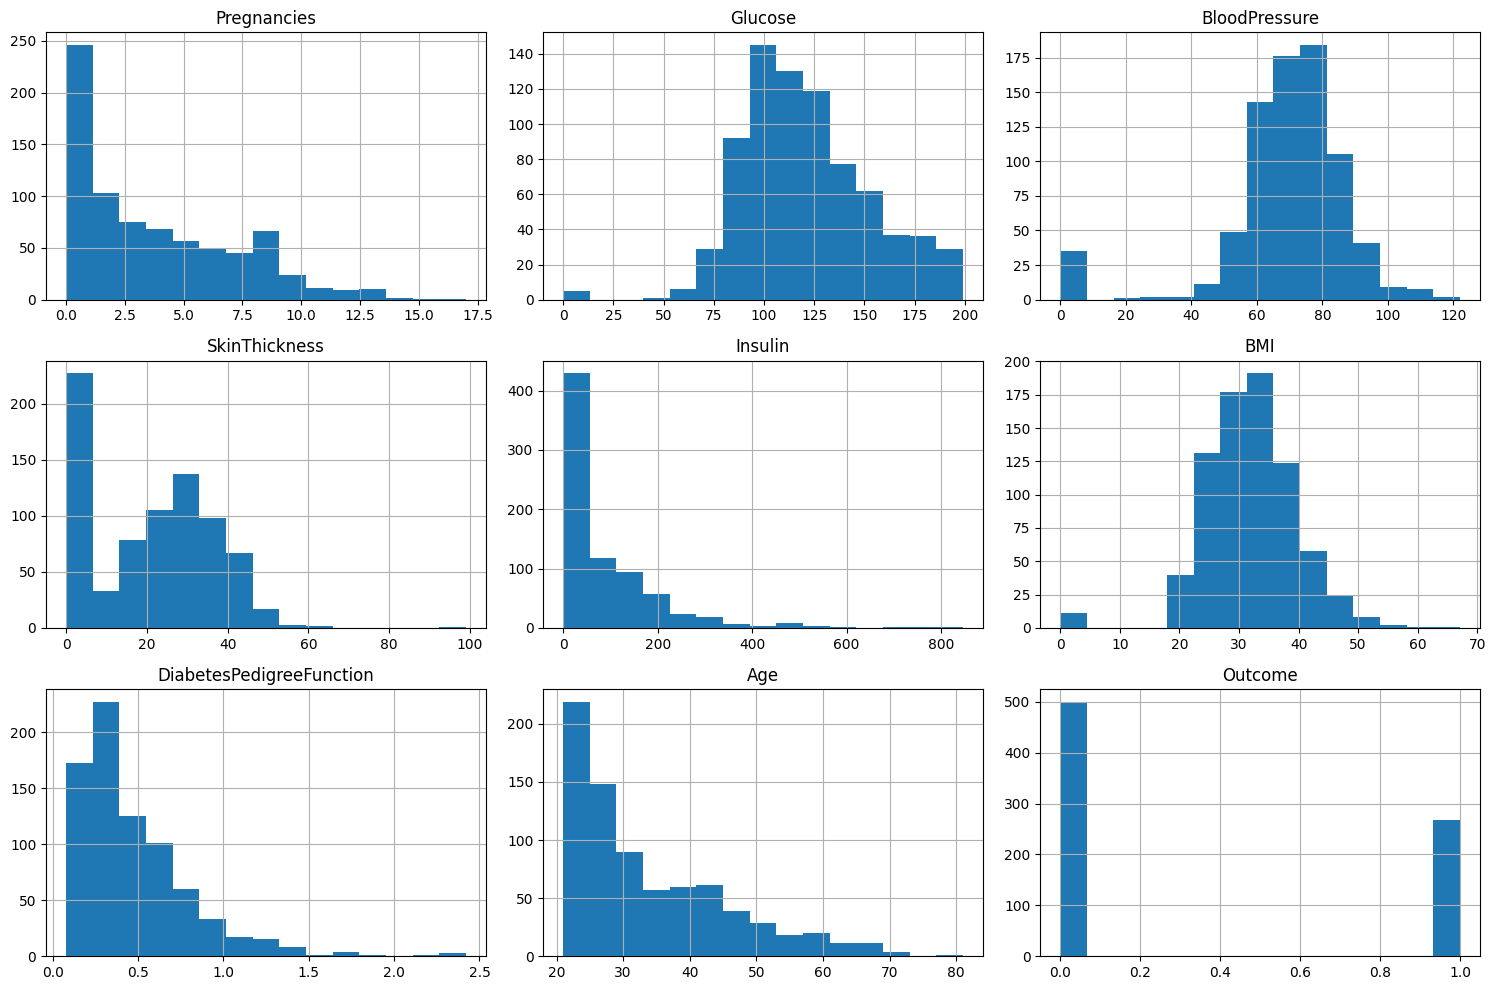

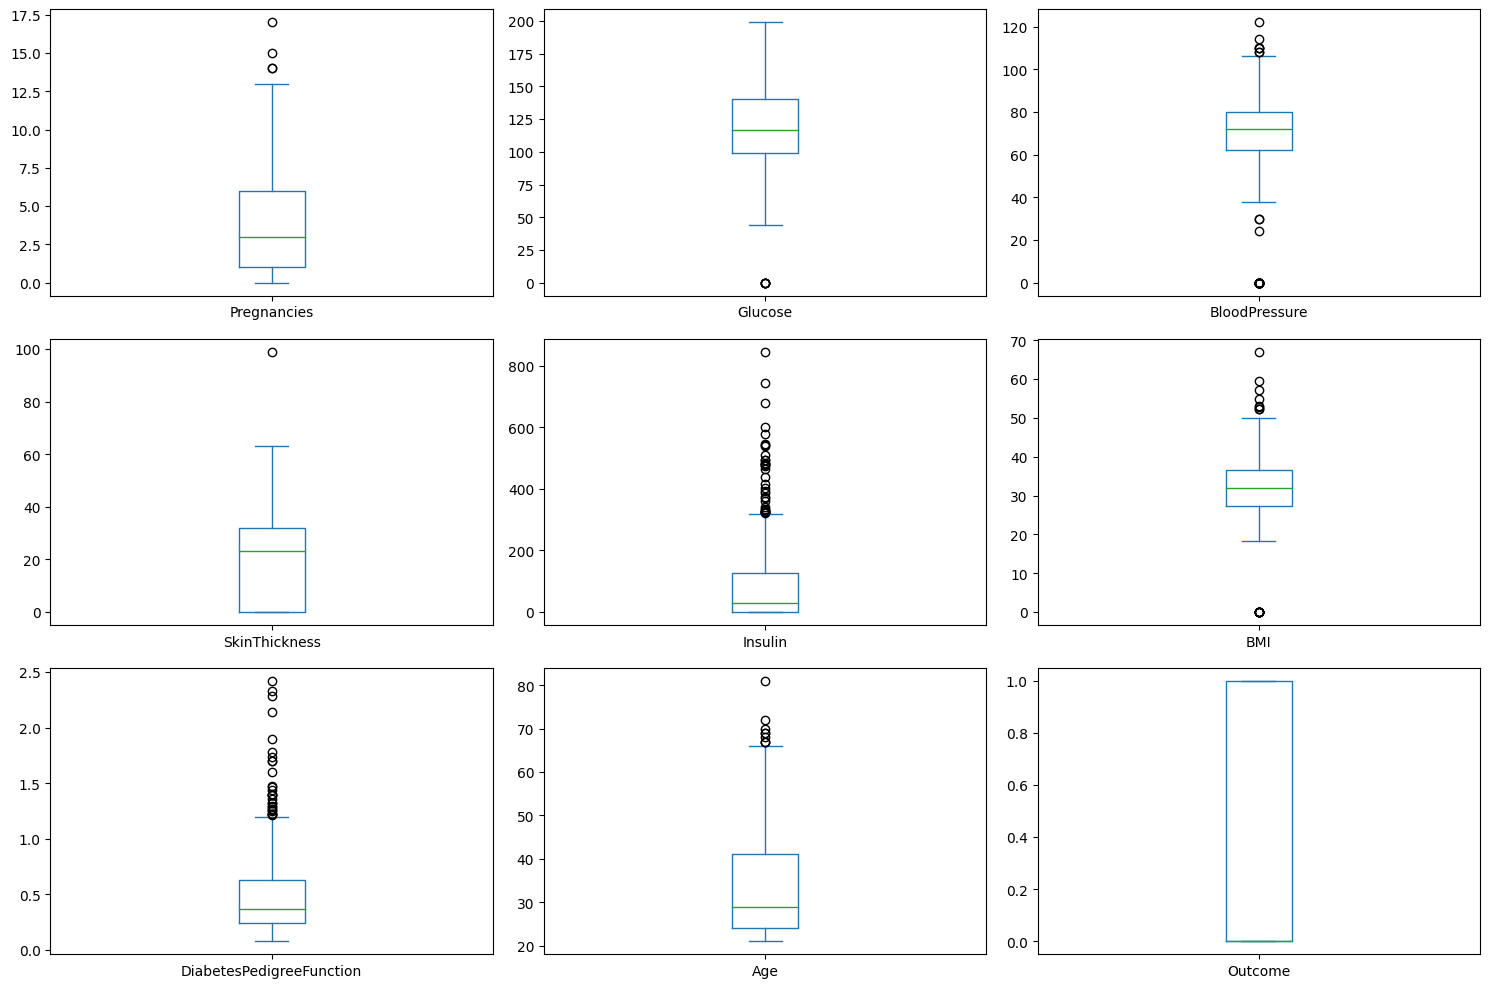

In [ ]:
# Histogramlar
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplotlar
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()


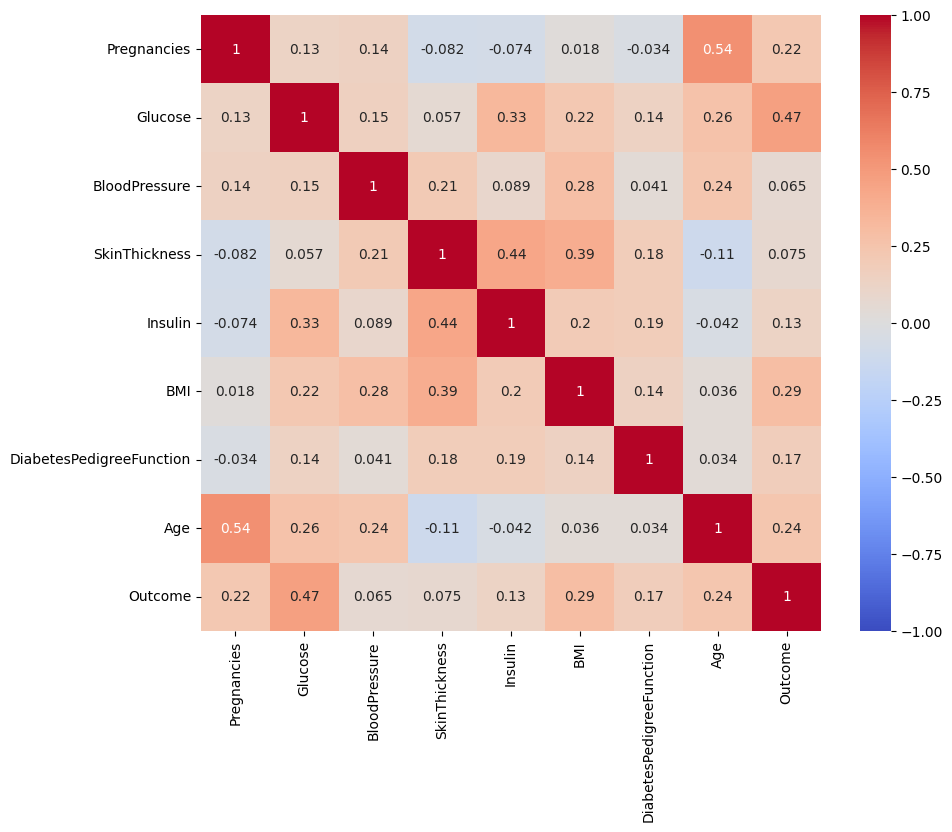

In [ ]:
# Korelasyon matrisi
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
# Eksik verileri kontrol etme
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

# Sıfır değerleri ortalama ile doldurma
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

# Eksik verilerin doldurulduğunu kontrol etme
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [ ]:
# Outlier'ları belirleme (z-skoru yöntemi)
from scipy import stats

z_scores = np.abs(stats.zscore(df.drop('Outcome', axis=1)))
print(np.where(z_scores > 3))  # Z-skoru 3'ten büyük olan verilerin indekslerini gösterir


# Outlier'ları belirleme (z-skoru yöntemi)
z_scores = np.abs(stats.zscore(df.drop('Outcome', axis=1)))
print(np.where(z_scores > 3))

# Outlier'ları kaldırma
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Outlier'ların kaldırıldığını kontrol etme
print(df.shape)
print(df_no_outliers.shape)

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 248,
       286, 298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445,
       453, 455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666,
       673, 684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2,
       3, 4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))
(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 248,
       286, 298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445,
       453, 455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666,
       673, 684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2,
       3, 4, 6

In [ ]:
# Veriyi normalize etme
scaler = StandardScaler()
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']
X_scaled = scaler.fit_transform(X)
#print(X_scaled)

In [ ]:
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Confusion Matrix:
[[127  25]
 [ 21  43]]


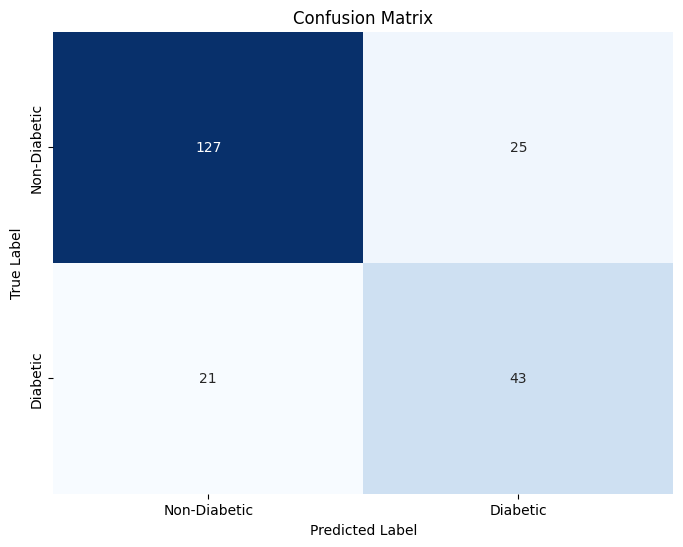

Accuracy: 0.79
Sensitivity (Recall): 0.67
Specificity: 0.84
Precision: 0.63
F1-Score: 0.65


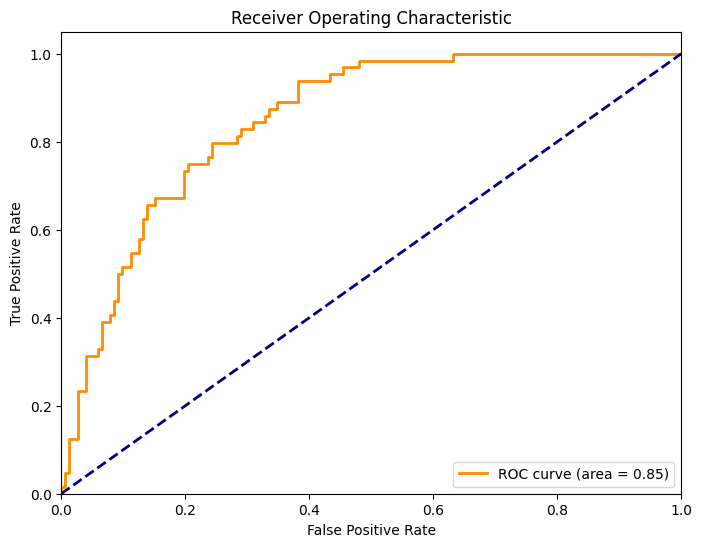

In [ ]:
# Naive Bayes modeli eğitme
model = GaussianNB()
model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = model.predict(X_test)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix.ravel()

# Performans metriklerini hesaplama
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC curve ve AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

En iyi k değeri: 19


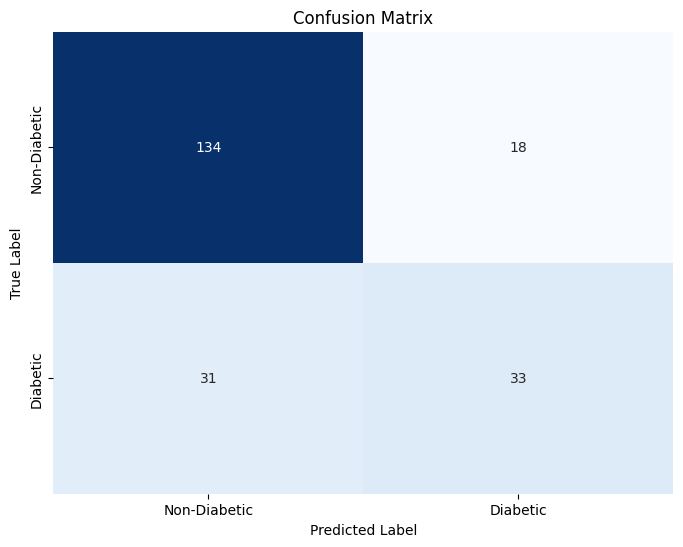

Accuracy: 0.77
Sensitivity (Recall): 0.52
Specificity: 0.88
Precision: 0.65
F1-Score: 0.57


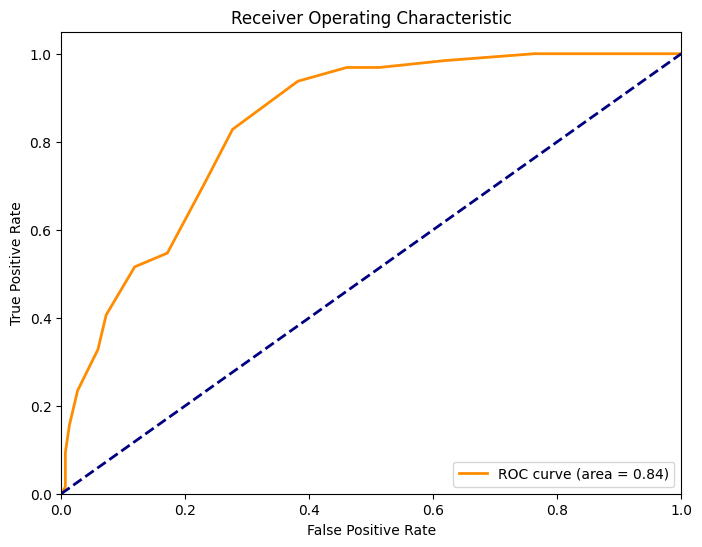

In [ ]:
#3. sorunun cevap kodları... tam süreç yazılmıştır raporda parçalarla kodlar anlatılmıstır.
from sklearn.neighbors import KNeighborsClassifier
# Veriyi yeniden eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Farklı k değerleri için KNN modelini değerlendirme
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# En iyi k değerini belirleme
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"En iyi k değeri: {best_k}")

# En iyi k değeri ile KNN modelini eğitme
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix.ravel()

# Performans metriklerini hesaplama
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC curve ve AUC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

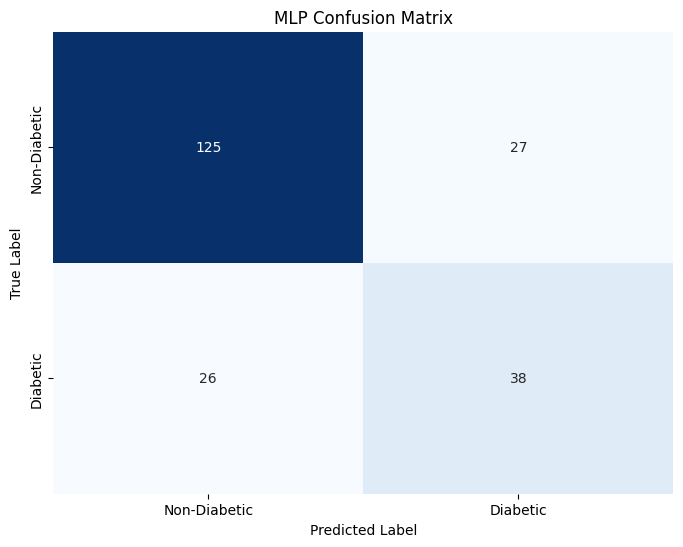

MLP Accuracy: 0.75
MLP Sensitivity (Recall): 0.59
MLP Specificity: 0.82
MLP Precision: 0.58
MLP F1-Score: 0.59


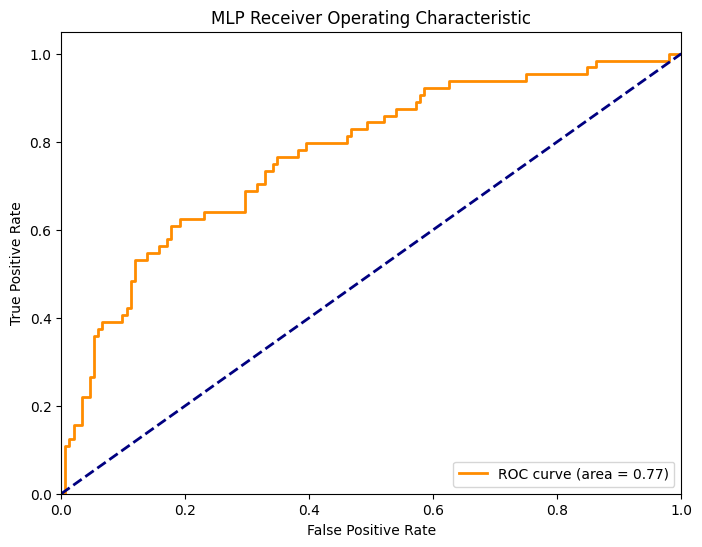

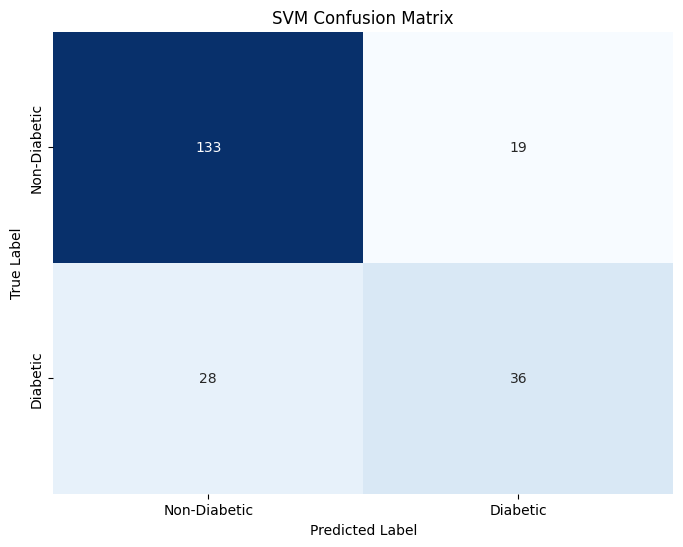

SVM Accuracy: 0.78
SVM Sensitivity (Recall): 0.56
SVM Specificity: 0.88
SVM Precision: 0.65
SVM F1-Score: 0.61


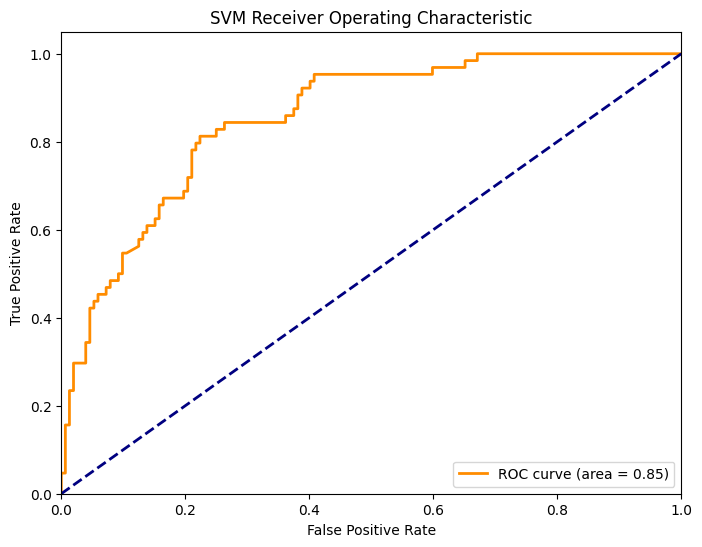

In [ ]:
# 4. soru için yazdığım kodlar

# Veriyi yeniden eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


# MLP modelini eğitme
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate_init=0.001, random_state=42, momentum=0.9)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Confusion matrix hesaplama
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_mlp.ravel()

# Performans metriklerini hesaplama
accuracy_mlp = (TP + TN) / (TP + TN + FP + FN)
sensitivity_mlp = TP / (TP + FN)
specificity_mlp = TN / (TN + FP)
precision_mlp = TP / (TP + FP)
f1_mlp = 2 * (precision_mlp * sensitivity_mlp) / (precision_mlp + sensitivity_mlp)

print(f"MLP Accuracy: {accuracy_mlp:.2f}")
print(f"MLP Sensitivity (Recall): {sensitivity_mlp:.2f}")
print(f"MLP Specificity: {specificity_mlp:.2f}")
print(f"MLP Precision: {precision_mlp:.2f}")
print(f"MLP F1-Score: {f1_mlp:.2f}")

# ROC curve ve AUC
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Support Vector Machines (SVM) Modeli

# SVM modelini eğitme
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Confusion matrix hesaplama
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_svm.ravel()

# Performans metriklerini hesaplama
accuracy_svm = (TP + TN) / (TP + TN + FP + FN)
sensitivity_svm = TP / (TP + FN)
specificity_svm = TN / (TN + FP)
precision_svm = TP / (TP + FP)
f1_svm = 2 * (precision_svm * sensitivity_svm) / (precision_svm + sensitivity_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Sensitivity (Recall): {sensitivity_svm:.2f}")
print(f"SVM Specificity: {specificity_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM F1-Score: {f1_svm:.2f}")

# ROC curve ve AUC
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# 5.soruda 	Size atanan veri setine tüm algoritmalar için optimizasyon uygulayınız. belirtildiği için tekrardan veri optimizasyon işlemleri uyguluyorum


"""# Veri setinin yüklenmesi
url = "veri-seti.txt"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, header=None, names=column_names)


# Eksik verileri kontrol etme
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

# Sıfır değerleri ortalama ile doldurma
df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].mean(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].mean(), inplace=True)
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)

# Outlier'ları belirleme (z-skoru yöntemi)
z_scores = np.abs(stats.zscore(df.drop('Outcome', axis=1)))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Veriyi normalize etme
scaler = StandardScaler()
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']
X_scaled = scaler.fit_transform(X)"""

'# Veri setinin yüklenmesi\nurl = "veri-seti.txt"\ncolumn_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]\ndf = pd.read_csv(url, header=None, names=column_names)\n\n\n# Eksik verileri kontrol etme\nprint((df[[\'Glucose\', \'BloodPressure\', \'SkinThickness\', \'Insulin\', \'BMI\']] == 0).sum())\n\n# Sıfır değerleri ortalama ile doldurma\ndf[\'Glucose\'].replace(0, df[\'Glucose\'].mean(), inplace=True)\ndf[\'BloodPressure\'].replace(0, df[\'BloodPressure\'].mean(), inplace=True)\ndf[\'SkinThickness\'].replace(0, df[\'SkinThickness\'].mean(), inplace=True)\ndf[\'Insulin\'].replace(0, df[\'Insulin\'].mean(), inplace=True)\ndf[\'BMI\'].replace(0, df[\'BMI\'].mean(), inplace=True)\n\n# Outlier\'ları belirleme (z-skoru yöntemi)\nz_scores = np.abs(stats.zscore(df.drop(\'Outcome\', axis=1)))\ndf_no_outliers = df[(z_scores < 3).all(axis=1)]\n\n# Veriyi normalize etme\nscaler = StandardScaler()\nX = df_no_outlie

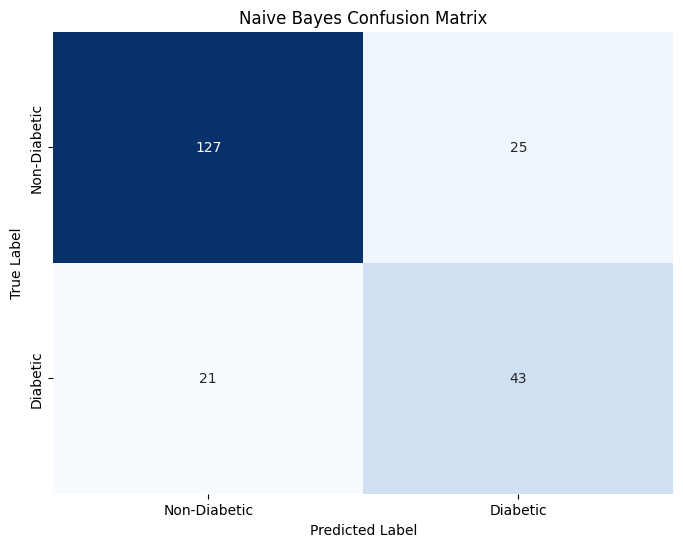

Naive Bayes Accuracy: 0.79
Naive Bayes Sensitivity (Recall): 0.67
Naive Bayes Specificity: 0.84
Naive Bayes Precision: 0.63
Naive Bayes F1-Score: 0.65


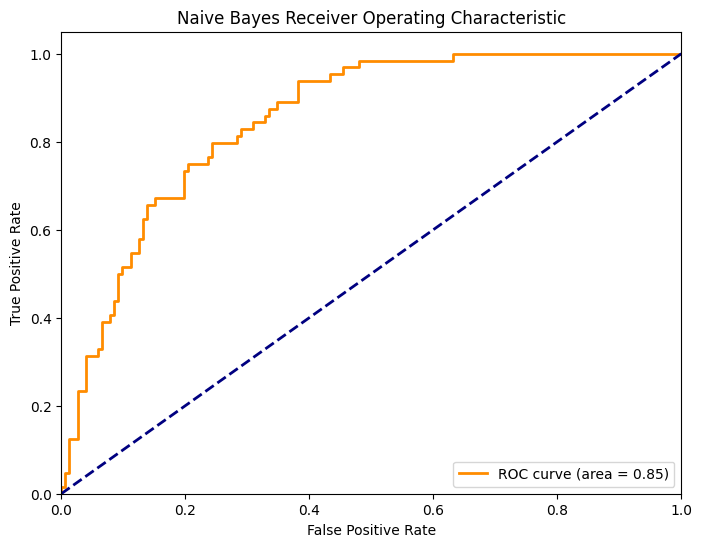

Naive Bayes Mean Squared Error: 0.21


In [ ]:
# 6. soru kodları
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, auc
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Naive Bayes modelini eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Confusion matrix hesaplama
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_nb.ravel()

# Performans metriklerini hesaplama
accuracy_nb = (TP + TN) / (TP + TN + FP + FN)
sensitivity_nb = TP / (TP + FN)
specificity_nb = TN / (TN + FP)
precision_nb = TP / (TP + FP)
f1_nb = 2 * (precision_nb * sensitivity_nb) / (precision_nb + sensitivity_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive Bayes Sensitivity (Recall): {sensitivity_nb:.2f}")
print(f"Naive Bayes Specificity: {specificity_nb:.2f}")
print(f"Naive Bayes Precision: {precision_nb:.2f}")
print(f"Naive Bayes F1-Score: {f1_nb:.2f}")

# ROC curve ve AUC
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ortalama Karesel Hata (MSE) hesaplama
mse_nb = mean_squared_error(y_test, y_pred_nb)
print(f"Naive Bayes Mean Squared Error: {mse_nb:.2f}")

En iyi k değeri: 19


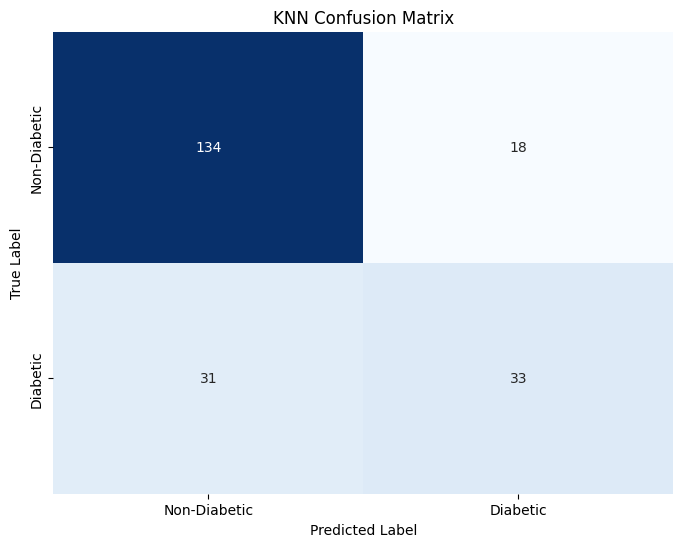

KNN Accuracy: 0.77
KNN Sensitivity (Recall): 0.52
KNN Specificity: 0.88
KNN Precision: 0.65
KNN F1-Score: 0.57


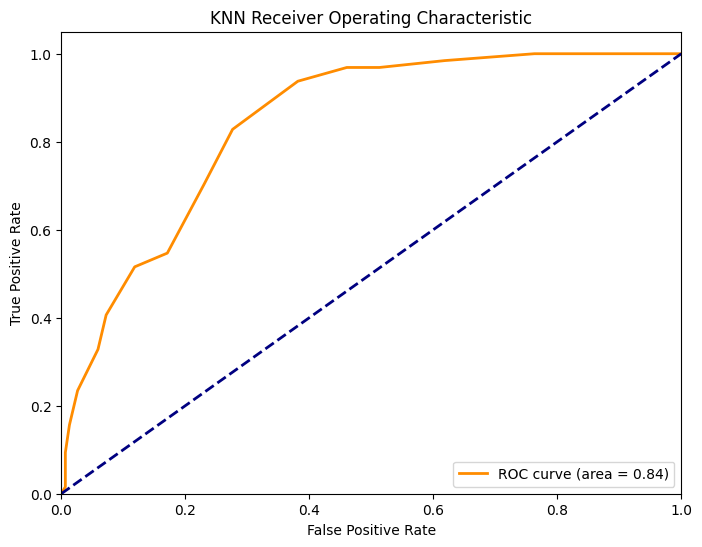

KNN Mean Squared Error: 0.23


In [ ]:
#7. sorunun cevabı kodlar

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# En iyi k değerini belirlemek için cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
print(f"En iyi k değeri: {best_k}")

# En iyi k değeri ile KNN modelini eğitme
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion matrix hesaplama
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_knn.ravel()

# Performans metriklerini hesaplama
accuracy_knn = (TP + TN) / (TP + TN + FP + FN)
sensitivity_knn = TP / (TP + FN)
specificity_knn = TN / (TN + FP)
precision_knn = TP / (TP + FP)
f1_knn = 2 * (precision_knn * sensitivity_knn) / (precision_knn + sensitivity_knn)

print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"KNN Sensitivity (Recall): {sensitivity_knn:.2f}")
print(f"KNN Specificity: {specificity_knn:.2f}")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"KNN F1-Score: {f1_knn:.2f}")

# ROC curve ve AUC
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ortalama Karesel Hata (MSE) hesaplama
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn:.2f}")

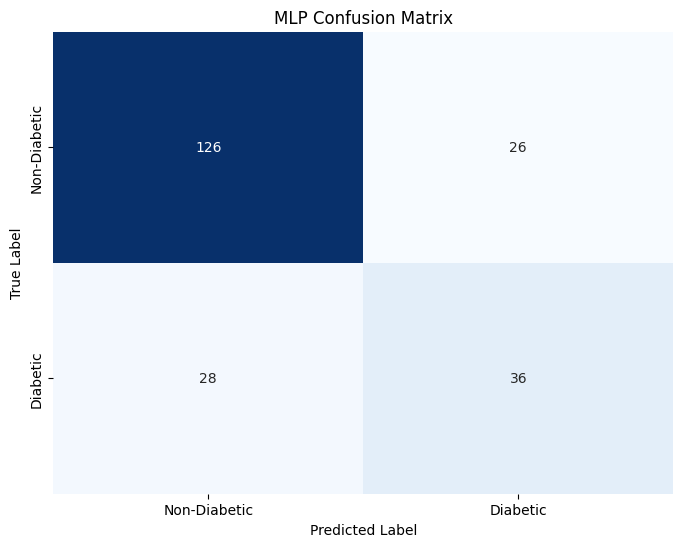

MLP Accuracy: 0.75
MLP Sensitivity (Recall): 0.56
MLP Specificity: 0.83
MLP Precision: 0.58
MLP F1-Score: 0.57


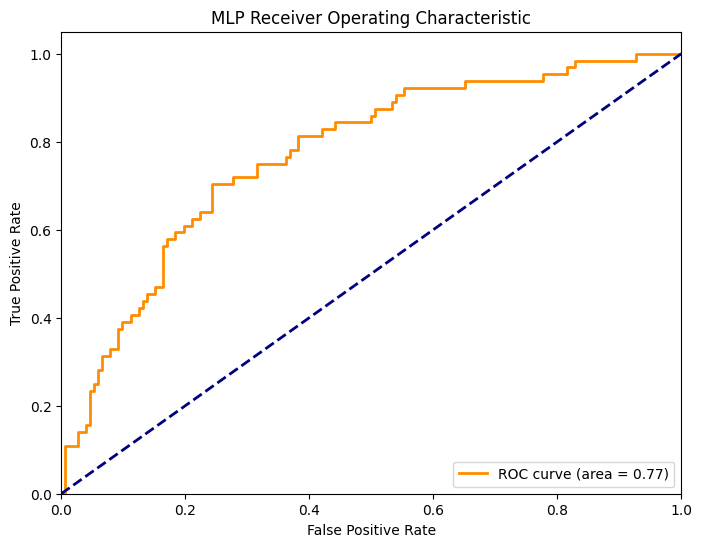

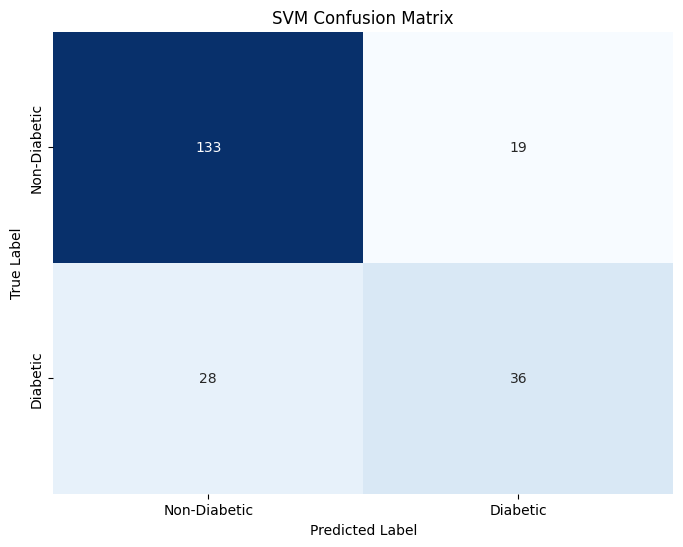

SVM Accuracy: 0.78
SVM Sensitivity (Recall): 0.56
SVM Specificity: 0.88
SVM Precision: 0.65
SVM F1-Score: 0.61


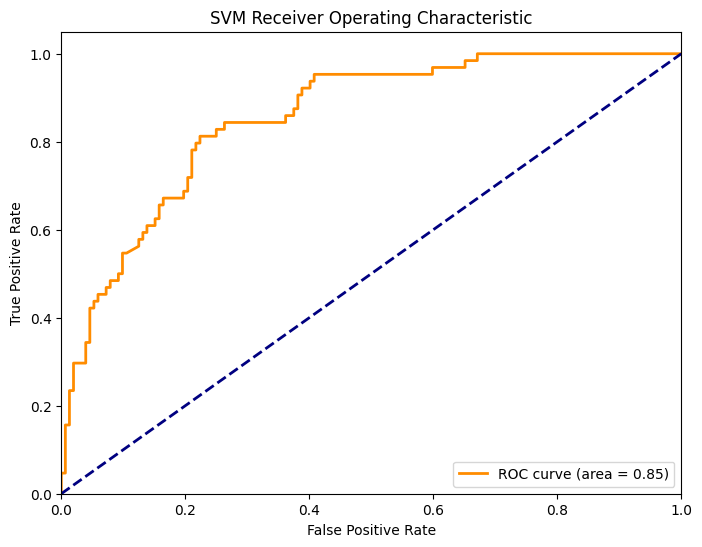

In [ ]:
#8. sorunun kodları

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# MLP modelini eğitme
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=900, learning_rate_init=0.002, random_state=42, momentum=0.9)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


# Confusion matrix hesaplama
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_mlp.ravel()

# Performans metriklerini hesaplama
accuracy_mlp = (TP + TN) / (TP + TN + FP + FN)
sensitivity_mlp = TP / (TP + FN)
specificity_mlp = TN / (TN + FP)
precision_mlp = TP / (TP + FP)
f1_mlp = 2 * (precision_mlp * sensitivity_mlp) / (precision_mlp + sensitivity_mlp)

print(f"MLP Accuracy: {accuracy_mlp:.2f}")
print(f"MLP Sensitivity (Recall): {sensitivity_mlp:.2f}")
print(f"MLP Specificity: {specificity_mlp:.2f}")
print(f"MLP Precision: {precision_mlp:.2f}")
print(f"MLP F1-Score: {f1_mlp:.2f}")

# ROC curve ve AUC
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# SVM modelini eğitme
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Confusion matrix hesaplama
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

# Confusion matrix bileşenlerini alma
TN, FP, FN, TP = conf_matrix_svm.ravel()

# Performans metriklerini hesaplama
accuracy_svm = (TP + TN) / (TP + TN + FP + FN)
sensitivity_svm = TP / (TP + FN)
specificity_svm = TN / (TN + FP)
precision_svm = TP / (TP + FP)
f1_svm = 2 * (precision_svm * sensitivity_svm) / (precision_svm + sensitivity_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Sensitivity (Recall): {sensitivity_svm:.2f}")
print(f"SVM Specificity: {specificity_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM F1-Score: {f1_svm:.2f}")

# ROC curve ve AUC
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Performans metriklerini bir tabloya yerleştirme
data = {
    'Model': ['MLP', 'SVM', 'KNN', 'NBayes'],
    'Accuracy': [accuracy_mlp, accuracy_svm, accuracy_knn, accuracy_nb],
    'Recall': [sensitivity_mlp, sensitivity_svm, sensitivity_knn, sensitivity_nb],
    'Specf.': [specificity_mlp, specificity_svm, specificity_knn, specificity_nb],
    'Prec.': [precision_mlp, precision_svm, precision_knn, precision_nb],
    'F1-Score': [f1_mlp, f1_svm, f1_knn, f1_nb],
    'ROC-AUC': [roc_auc_mlp, roc_auc_svm, roc_auc_knn, roc_auc_nb]
}

df_results = pd.DataFrame(data)
print(df_results)

    Model  Accuracy    Recall    Specf.     Prec.  F1-Score   ROC-AUC
0     MLP  0.750000  0.562500  0.828947  0.580645  0.571429  0.771484
1     SVM  0.782407  0.562500  0.875000  0.654545  0.605042  0.853875
2     KNN  0.773148  0.515625  0.881579  0.647059  0.573913  0.841386
3  NBayes  0.787037  0.671875  0.835526  0.632353  0.651515  0.850740
